In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

### Problema 1
Desarrolle una funcion que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones,
donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la
intensidad del color gris de cada pixel.

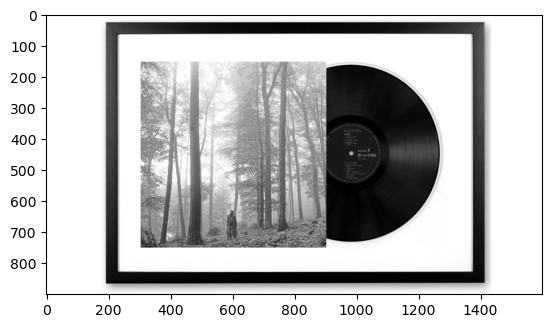

In [2]:
strImg = "TS_folklore.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

In [3]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    
    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])

    #parte entera del centro del kernel
    step = int(len(kernel[0,:])/2)

    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = int(newPixel)
    return newImg

In [4]:
def derivadaX(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    DerivadaX = np.zeros((alto, ancho, 1)) #alto, ancho, 1 canal porque es escala de grises
    kernel = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])
    img = convolutional_filter(img, kernel)
    for i in range(0, alto):
        for j in range(0, ancho - 1):
            derX = img[i, j + 1] - img[i, j]
            DerivadaX[i, j] = derX
    return DerivadaX

In [5]:
imgDerX = derivadaX(img)
cv2.imwrite("DerX.jpg", imgDerX)

True

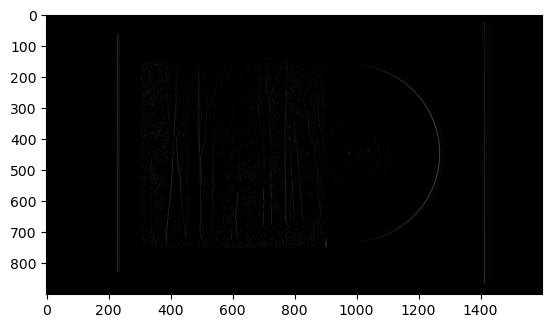

In [6]:
strImg = "DerX.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

In [7]:
def derivadaY(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    DerivadaY = np.zeros((alto, ancho, 1))
    kernel = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])
    img = convolutional_filter(img, kernel)
    for i in range(0, alto - 1):
        for j in range(0, ancho):
            derY = img[i + 1, j] - img[i, j] #resta del valor siguiente, menos el anterior
            DerivadaY[i, j] = derY
    return DerivadaY

In [8]:
imgDerY = derivadaY(img)
cv2.imwrite("DerY.jpg", imgDerY)

True

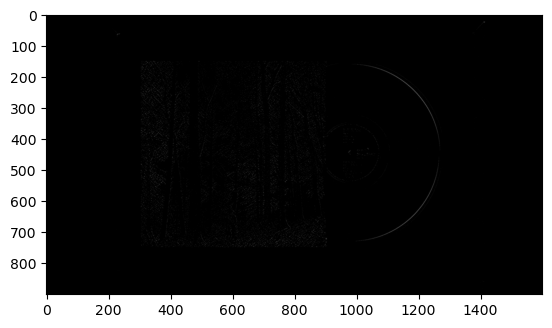

In [9]:
strImg = "DerY.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

In [10]:
def magnitud(dx, dy):
    alto = img.shape[0]
    ancho = img.shape[1]
    salida = np.zeros((alto, ancho, 1))
    for i in range(0, alto):
        for j in range(0, ancho):
            mag = math.sqrt(dx[i,j]**2 + dy[i,j]**2)
            salida[i,j] = mag
    return salida

In [11]:
magnitudOut = magnitud(imgDerX, imgDerY)
cv2.imwrite("Z.jpg", magnitudOut)

True

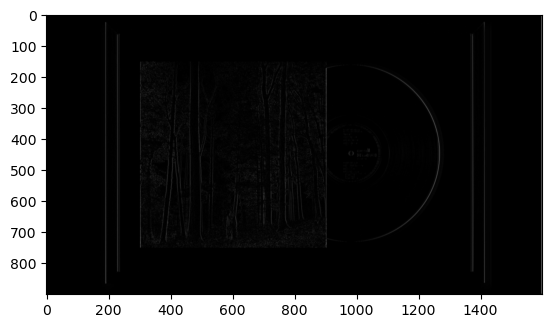

In [12]:
strImg = "Z.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

### Problema 2
Implemente una funcion para cada una de las transformaciones vistas en clase: negativa, lineal,
logarıtmica y exponencial.

#### Transformacion Negativa

In [ ]:
strImg = "star-wars-ahsoka.jpg"
img = cv2.imread(strImg)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
#histograma bgr
color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([img], 
                         [i], None,
                         [256], 
                         [0, 256])
      
    plt.plot(histr, color = col)
      
    # Limit X - axis to 256
    plt.xlim([0, 256])
      
plt.show()

In [15]:
height, width, _ = img.shape
  
for i in range(0, height - 1):
    for j in range(0, width - 1):
        pixel = img[i, j] #valor del pixel 
          
        # Negacion de cada canal, se resta el valor a 255
        pixel[0] = 255 - pixel[0] #rojo
        pixel[1] = 255 - pixel[1] #verde
        pixel[2] = 255 - pixel[2] #azul 
          
        img[i, j] = pixel

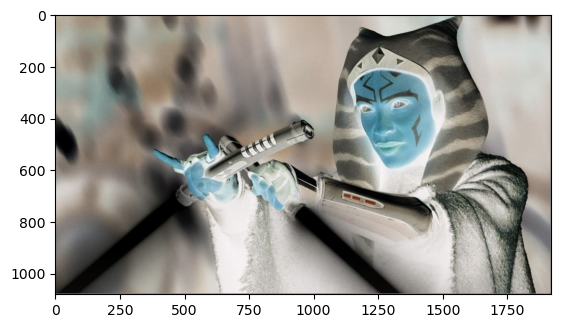

In [16]:
plt.imshow(img)
plt.show()

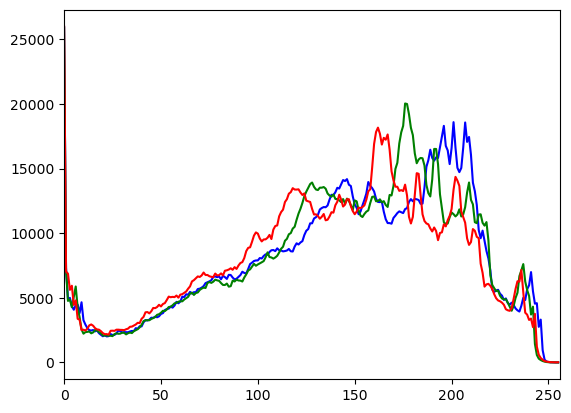

In [17]:
color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([img], 
                         [i], None,
                         [256],
                         [0, 256])
      
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
      
plt.show()

In [42]:
strImg2 = "star-wars-ahsoka.jpg"
img_neg = cv2.imread(strImg)
img_neg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_log = cv2.imread(strImg)
img_log = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

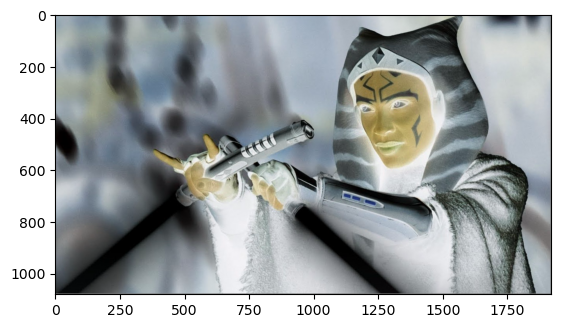

In [43]:
#negativa
height, width, _ = img_neg.shape
  
for i in range(0, height - 1):
    for j in range(0, width - 1):
        pixel = img_neg[i, j] #valor del pixel 
          
        # Negacion de cada canal, se resta el valor a 255
        pixel[0] = 255 - pixel[0] #rojo
        pixel[1] = 255 - pixel[1] #verde
        pixel[2] = 255 - pixel[2] #azul 
          
        img_neg[i, j] = pixel

plt.imshow(img_neg)
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_19928\2666709349.py:3: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(img2 + 1))


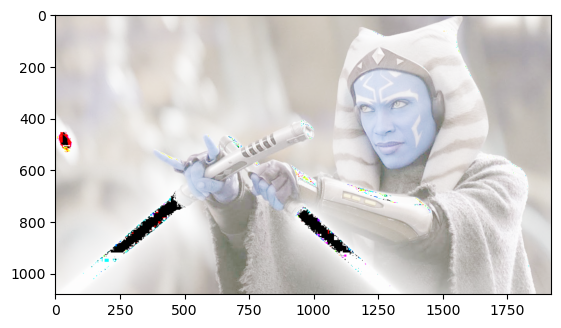

In [47]:
#logaritmica
c = 255 / np.log(1 + np.max(img_log))
log_image = c * (np.log(img2 + 1))

log_image = np.array(log_image, dtype = np.uint8)
plt.imshow(log_image)
plt.show()

### Problema 3
Desarrolle una funcion que dada dos imagenes a color, realice las operaciones SUMA, RESTA, AND,
OR , XOR con ambas im´agenes recuerde que para realizar las operaciones l´ogicas es necesario pasar
la imagen a escala de grises y luego binarizarla.

In [29]:

def op_aritmeticas_imagenes(img1, img2):
        alto1, ancho1, canales1 = img1.shape
        alto2, ancho2, canales2 = img2.shape

        if alto1 != alto2 or ancho1 != ancho2:
                img2 = cv2.resize(img2, (ancho1, alto1))

        #suma
        suma = cv2.addWeighted(img1, 0.5, img2, 0.4, 0)
        cv2.imwrite("Suma.jpg", suma)
        strImg = "Suma.jpg"
        img = cv2.imread(strImg)
        plt.imshow(img, cmap="gray")

        #resta
        resta = cv2.subtract(img1, img2)
        cv2.imwrite("Resta.jpg", resta)
        strImg = "Resta.jpg"
        img = cv2.imread(strImg)
        plt.imshow(img, cmap="gray")

        #and
        and_function = cv2.bitwise_and(img2, img1, mask = None)
        cv2.imwrite("And.jpg", and_function)
        strImg = "And.jpg"
        img = cv2.imread(strImg)
        plt.imshow(img, cmap="gray")

        #or
        or_function = cv2.bitwise_or(img2, img1, mask = None)
        cv2.imwrite("Or.jpg", or_function)
        strImg = "Or.jpg"
        img = cv2.imread(strImg)
        plt.imshow(img, cmap="gray")

        #xor
        xor_function = cv2.bitwise_or(img2, img1, mask = None)
        cv2.imwrite("Xor.jpg", xor_function)
        strImg = "Xor.jpg"
        img = cv2.imread(strImg)
        plt.imshow(img, cmap="gray")

        return suma, resta, and_function, or_function, xor_function 


(array([[[ 9,  4,  1],
         [ 9,  4,  1],
         [ 9,  4,  1],
         ...,
         [15,  9,  2],
         [15,  9,  2],
         [15,  9,  2]],
 
        [[ 9,  4,  1],
         [ 9,  4,  1],
         [ 9,  4,  1],
         ...,
         [16, 10,  2],
         [16, 10,  2],
         [16, 10,  2]],
 
        [[ 9,  4,  1],
         [ 9,  4,  1],
         [ 9,  4,  1],
         ...,
         [16, 11,  3],
         [16, 11,  3],
         [16, 11,  3]],
 
        ...,
 
        [[17,  7,  0],
         [17,  7,  0],
         [17,  7,  0],
         ...,
         [21, 11,  4],
         [21, 11,  4],
         [21, 11,  4]],
 
        [[17,  7,  0],
         [17,  7,  0],
         [17,  7,  0],
         ...,
         [23, 13,  6],
         [21, 11,  4],
         [20, 10,  3]],
 
        [[17,  7,  0],
         [17,  7,  0],
         [17,  7,  0],
         ...,
         [24, 14,  7],
         [22, 12,  5],
         [20, 10,  3]]], dtype=uint8),
 array([[[ 0,  0,  0],
         [ 0,  0,  

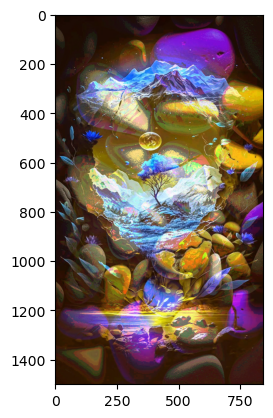

In [32]:
fondo1 = cv2.imread('fondo1.jpg') 
fondo2 = cv2.imread('fondo2.jpg')
op_aritmeticas_imagenes(fondo1, fondo2)

### Problema 4
Realice una comparacion entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano
para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV
y cualquier imagen, como entregable debe mostrar una comparaci˜An entre los tres enfoques con
una tabla donde se muestre las ventajas y desventajas de cada enfoque.

### Problema 5
Utilizando funciones de OpenCV deber´a aplicar los filtros de convoluci´on de tama˜no de kernel (3x3, 5x5 y 7x7) las operaciones que deber´a realizar son las siguientes: <br>
Kernel Gaussiano de riodo. <br>
Kernel Box de ruido.<br>
Kernel de mediana para ruido. <br>
Kernel Sobel para detecci´on de bornes (en X e Y). <br>
Kernel Lapaciano para detecci´on de bordes. <br>
Kernel de realce (Sharpening). <br>
Kernel de relieve (Embossing) <br>
